# Part1a

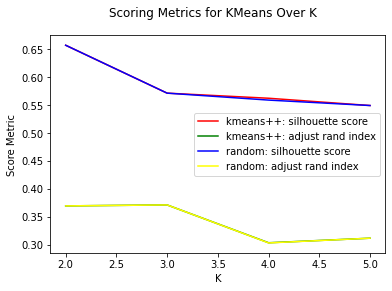

In [11]:
import numpy as np
import pandas as pd 
from sklearn import datasets
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score
import matplotlib.cm as cm
from sklearn.metrics.cluster import adjusted_rand_score

(X, y) = datasets.load_wine(return_X_y=True)

k_min = 2
k_max = 6
clrs = ['red', 'green', 'blue', 'yellow']
clr_i = 0
inits = ['kmeans++', 'random']
silhouette_avgs = []
adjusted_rand = []
for i in inits:
    for k in range(k_min, k_max):
        
        km = KMeans(
            n_clusters=k, init='random'
        )

        y_km = km.fit_predict(X)

        # computing sillouette avg score
        silhouette_avg = silhouette_score(X, y_km)
        silhouette_avgs.append(silhouette_avg)
        adjusted_rand.append(adjusted_rand_score(y, y_km))

    sil_title = i + ": silhouette score"
    adj_title = i + ": adjust rand index"
    sil_clr = clrs[clr_i]
    adj_clr = clrs[clr_i + 1]
    plt.plot(range(k_min, k_max), silhouette_avgs, c=sil_clr, label=sil_title)
    plt.plot(range(k_min, k_max), adjusted_rand, c=adj_clr, label=adj_title)
    silhouette_avgs = []
    adjusted_rand = []
    clr_i += 2


plt.legend()
plt.xlabel('K')
plt.ylabel('Score Metric')
plt.suptitle("Scoring Metrics for KMeans Over K")
plt.show()

# Part1b

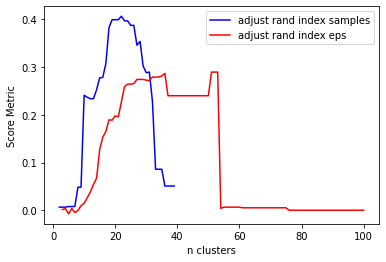

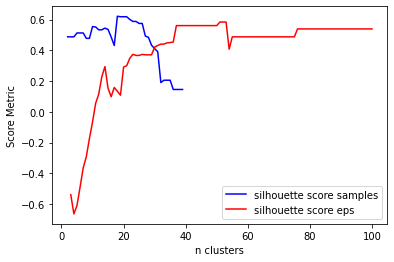


Min Samples Results ###
Silhouette Score: 0.6219346011105124 Suggested Param: 18
Adjusted Rand Score: 0.40665375935014153 Suggested Param: 22

EPS Results ###
Silhouette Score: 0.5842311574667655 Suggested Param: 51
Adjusted Rand Score: 0.2897315539672838 Suggested Param: 51


In [12]:
import numpy as np
import pandas as pd 
from sklearn import datasets

import matplotlib.pyplot as plt
from sklearn.metrics import silhouette_samples, silhouette_score
import matplotlib.cm as cm
from sklearn.metrics.cluster import adjusted_rand_score

from sklearn.cluster import DBSCAN

(X, y) = datasets.load_wine(return_X_y=True)

eps_min = 3
eps_max = 101
samples_min = 2
samples_max = 40
clrs = ['red', 'green', 'blue', 'yellow', 'purple']

eps_silhouette_avgs = []
eps_adjusted_rand = []
samples_silhouette_avgs = []
samples_adjusted_rand = []

for k in range(eps_min, eps_max):
    
    db = DBSCAN(eps=k, min_samples=2)
    labels = db.fit_predict(X)
    silhouette_avg = silhouette_score(X, labels)
    eps_silhouette_avgs.append(silhouette_avg)

    eps_adjusted_rand.append(adjusted_rand_score(y, labels))

for k in range(samples_min, samples_max):
    
    db = DBSCAN(eps=60, min_samples=k)
    labels = db.fit_predict(X)
    silhouette_avg = silhouette_score(X, labels)
    samples_silhouette_avgs.append(silhouette_avg)

    samples_adjusted_rand.append(adjusted_rand_score(y, labels))

plt.clf()
plt.plot(range(samples_min, samples_max), samples_adjusted_rand, c='blue', label='adjust rand index samples')
plt.plot(range(eps_min, eps_max), eps_adjusted_rand, c='red', label='adjust rand index eps')
plt.legend()
plt.xlabel('n clusters')
plt.ylabel('Score Metric')
plt.show()

plt.clf()
plt.plot(range(samples_min, samples_max), samples_silhouette_avgs, c='blue', label='silhouette score samples')
plt.plot(range(eps_min, eps_max), eps_silhouette_avgs, c='red', label='silhouette score eps')
plt.legend()
plt.xlabel('n clusters')
plt.ylabel('Score Metric')
plt.show()

best_sample_silhouette_score = max(samples_silhouette_avgs)
best_samples_adjust_rand_score = max(samples_adjusted_rand)
best_eps_silhouette_score = max(eps_silhouette_avgs)
best_eps_adjust_rand_score = max(eps_adjusted_rand)

best_sample_silhouette = samples_silhouette_avgs.index(best_sample_silhouette_score) + samples_min
best_samples_adjust_rand = samples_adjusted_rand.index(best_samples_adjust_rand_score) + samples_min
best_eps_silhouette = eps_silhouette_avgs.index(best_eps_silhouette_score) + eps_min
best_eps_adjust_rand = eps_adjusted_rand.index(best_eps_adjust_rand_score) + eps_min


print("\nMin Samples Results ###")
print("Silhouette Score: " + str(best_sample_silhouette_score) + " Suggested Param: " + str(best_sample_silhouette))
print("Adjusted Rand Score: " + str(best_samples_adjust_rand_score) + " Suggested Param: " + str(best_samples_adjust_rand))

print("\nEPS Results ###")
print("Silhouette Score: " + str(best_eps_silhouette_score) + " Suggested Param: " + str(best_eps_silhouette))
print("Adjusted Rand Score: " + str(best_eps_adjust_rand_score) + " Suggested Param: " + str(best_eps_adjust_rand))

# Part1c

In this application KMeans produced the best results at K = 2 with random and kmeans++ initializers not making much noticeable difference. The DBSCAN clustering produced the best results with a samples count of 18 or 22, and an eps value of 51. Overall the KMeans method seemed to produce the best results at K = 2 with a silhouette coeeficient juust above 0.65